# MAC0460 / MAC5832 (2020)
<hr>

## EP2: linear regression, analytic solution

### Goals:

- to implement and test the analytic solution for the linear regression task (see, for instance, <a href="http://work.caltech.edu/slides/slides03.pdf">Slides of Lecture 03</a> and Lecture 03 of *Learning from Data*)
- to understand the core idea (*optimization of a loss or cost function*) for parameter adjustment in machine learning

This notebook makes use of additional auxiliary functions in <t>util/</t>
<hr>

# Linear regression

Given a dataset $\{(\mathbf{x}^{(1)}, y^{(1)}), \dots ,(\mathbf{x}^{(N)}, y^{(N)})\}$ with $\mathbf{x}^{(i)} \in \mathbb{R}^{d}$ and $y^{(i)} \in \mathbb{R}$, we would like to approximate the unknown function $f:\mathbb{R}^{d} \rightarrow \mathbb{R}$ (recall that $y^{(i)} =f(\mathbf{x}^{(i)})$) by means of a linear model $h$:
$$
h(\mathbf{x}^{(i)}; \mathbf{w}, b) = \mathbf{w}^\top  \mathbf{x}^{(i)} + b
$$

Note that $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ is, in fact, an  [affine transformation](https://en.wikipedia.org/wiki/Affine_transformation) of  $\mathbf{x}^{(i)}$. As commonly done, we will use the term "linear" to refer to an affine transformation.

The output of $h$ is a linear transformation of $\mathbf{x}^{(i)}$. We use the notation $h(\mathbf{x}^{(i)}; \mathbf{w}, b)$ to make clear that $h$ is a parametric model, i.e., the transformation $h$ is defined  by the parameters $\mathbf{w}$ and $b$. We can view vector $\mathbf{w}$ as a *weight* vector that controls the effect of each *feature* in the prediction.

By adding one component with value equal to 1 to the observations $\mathbf{x}^{(i)}$ -- artificial coordinate -- we can simplify the notation:

$$
h(\mathbf{x}^{(i)}; \mathbf{w}) = \hat{y}^{(i)} = \mathbf{w}^\top  \mathbf{x}^{(i)}
$$

We would like to determine the optimal parameters $\mathbf{w}$ such that prediction $\hat{y}^{(i)}$ is as closest as possible to $y^{(i)}$ according to some error metric. Adopting the *mean square error* as such metric we have the following cost function:

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}\sum_{i=1}^{N}\big(\hat{y}^{(i)} - y^{(i)}\big)^{2}
\end{equation}

Thus, the task of determining a function $h$ that is closest to $f$ is reduced to the task of finding the values $\mathbf{w}$ that minimizes $J(\mathbf{w})$.

**Now we will explore this model, starting with a simple dataset.**


### Import auxiliary functions

In [14]:
# all imports
import numpy as np
import time
from util.util import get_housing_prices_data, r_squared
from util.plots import plot_points_regression 

%matplotlib inline

### The dataset 

The first dataset we will use is a toy dataset. We will generate $N=100$ observations with only one *feature* and a real value associated to each of them. We can view these observations as being pairs *(area of a real state in square meters, price of the real state)*. Our task is to construct a model that is able to predict the price of a real state, given its area.

In [15]:
X, y = get_housing_prices_data(N=100)


X shape = (100, 1)

y shape = (100, 1)

X:
mean 645.0, sdt 323.65, max 1200.0, min 90.0

y:
mean 44848.984375, sdt 17341.68, max 75893.3125, min 13571.9892578125


### Ploting the data

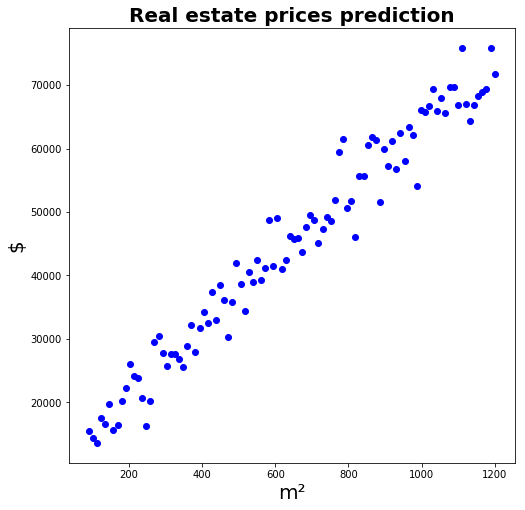

In [16]:
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$')

### The solution

Given $f:\mathbb{R}^{N\times d} \rightarrow \mathbb{R}$ and $\mathbf{A} \in \mathbb{R}^{N\times d}$, we define the gradient of $f$ with respect to $\mathbf{A}$ as:

\begin{equation*}
\nabla_{\mathbf{A}}f = \frac{\partial f}{\partial \mathbf{A}} =  \begin{bmatrix}
\frac{\partial f}{\partial \mathbf{A}_{1,1}} & \dots & \frac{\partial f}{\partial \mathbf{A}_{1,m}} \\
\vdots &  \ddots & \vdots \\
\frac{\partial f}{\partial \mathbf{A}_{n,1}} &  \dots & \frac{\partial f}{\partial \mathbf{A}_{n,m}}
\end{bmatrix}
\end{equation*}

Let $\mathbf{X} \in \mathbb{R}^{N\times d}$ be a matrix whose rows are the observations of the dataset (sometimes also called the *design matrix*) and let $\mathbf{y} \in \mathbb{R}^{N}$ be the vector consisting of all values of $y^{(i)}$ (i.e., $\mathbf{X}^{(i,:)} = \mathbf{x}^{(i)}$ and $\mathbf{y}^{(i)} = y^{(i)}$). It can be verified that: 

\begin{equation}
J(\mathbf{w}) = \frac{1}{N}(\mathbf{X}\mathbf{w} - \mathbf{y})^{T}(\mathbf{X}\mathbf{w} - \mathbf{y})
\end{equation}

Using basic matrix derivative concepts we can compute the gradient of $J(\mathbf{w})$ with respect to $\mathbf{w}$:

\begin{equation}
\nabla_{\mathbf{w}}J(\mathbf{w}) = \frac{2}{N} (\mathbf{X}^{T}\mathbf{X}\mathbf{w} -\mathbf{X}^{T}\mathbf{y})   
\end{equation}

Thus, when $\nabla_{\mathbf{w}}J(\mathbf{w}) = 0$ we have 

\begin{equation}
\mathbf{X}^{T}\mathbf{X}\mathbf{w} = \mathbf{X}^{T}\mathbf{y}
\end{equation}

Hence,

\begin{equation}
\mathbf{w} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}\mathbf{y}
\end{equation}

Note that this solution has a high computational cost. As the number of variables (*features*) increases, the cost for matrix inversion becomes prohibitive. See  [this text](http://cs229.stanford.edu/notes/cs229-notes1.pdf) for more details.

## Exercise 1
Using only **NumPy** (a quick introduction to this library can be found  [here](http://cs231n.github.io/python-numpy-tutorial/)), complete the two functions below. Recall that $\mathbf{X} \in \mathbb{R}^{N\times d}$; thus you will need to add a component of value 1 to each of  the observations in $\mathbf{X}$ before performing the computation described above.

NOTE: Although the dataset above has data of dimension $d=1$, your code must be generic (it should work for $d\geq1$)

In [51]:
def normal_equation_weights(X, y):
    """
    Calculates the weights of a linear function using the normal equation method.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: regression targets
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(d+1, 1))
    """
    
    # START OF YOUR CODE:
    Y = X.copy()
    Y.resize(len(X), len(X[0]) + 1)
    for i, val in enumerate(X):
        Y[i][len(Y[0]) - 1] = 1
    YT = Y.T
    Yaux = np.matmul(YT, Y)
    Yc = np.matmul(np.linalg.inv(Yaux), YT)
    w = np.matmul(Yc, y)
    w = np.array([w[0][0], w[1][0]])
    # END YOUR CODE

    return w

In [52]:
# test of function normal_equation_weights()

w = 0  # this is not necessary
w = normal_equation_weights(X, y)
print("Estimated w = ", w)

Estimated w =  [-2.0534569e+01  5.0869766e+04]


In [59]:
def normal_equation_prediction(X, w):
    """
    Calculates the prediction over a set of observations X using the linear function
    characterized by the weight vector w.
    You should add into X a new column with 1s.

    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weight vector
    :type w: np.ndarray(shape=(d+1, 1))
    :param y: regression prediction
    :type y: np.ndarray(shape=(N, 1))
    """
    
    # START OF YOUR CODE:
    Y = np.ndarray(len(X))
    Z = X.copy()
    wT = w.T
    print(wT)
    Z.resize(len(Z), len(Z[0]) + 1)
    for i, val in enumerate(Z):
        Z[i][len(Z[0]) - 1] = 1
        Y[i] = np.dot(wT, Z[i])
    prediction = Y
    # END YOUR CODE
    
    return prediction


You can use the [$R^2$](https://pt.wikipedia.org/wiki/R%C2%B2) metric to evaluate how well the linear model fits the data.

**It is expected that $𝑅^2$ is a value close to 0.5.**

[-2.0534569e+01  5.0869766e+04]


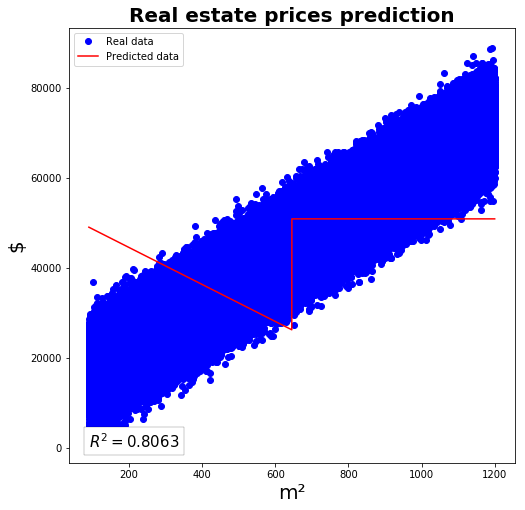

In [60]:
# test of function normal_equation_prediction()
prediction = normal_equation_prediction(X, w)
r_2 = r_squared(y, prediction)
plot_points_regression(X,
                       y,
                       title='Real estate prices prediction',
                       xlabel="m\u00b2",
                       ylabel='$',
                       prediction=prediction,
                       legend=True,
                       r_squared=r_2)

## Additional tests

Let us compute a prediction for $x=650$


In [21]:
# Let us use the prediction function
x = np.asarray([650]).reshape(1,1)
prediction = normal_equation_prediction(x, w)
print("Area = %.2f  Predicted price = %.4f" %(x[0], prediction))

# another way of computing the same
y = np.dot(np.asarray((1,x)), w)
print("Area = %.2f  Predicted price = %.4f" %(x, y))


Area = 650.00  Predicted price = 37995.1879
Area = 650.00  Predicted price = 33463748.9765


## Exercise 2: Effect of the number of samples

Change the number of samples $N$ and observe how processing time varies.

In [22]:
# Testing different values for N
X, y = get_housing_prices_data(N=1000000)
init = time.time()
w = normal_equation_weights(X, y)
prediction = normal_equation_prediction(X,w)
init = time.time() - init

print("Execution time = {:.8f}(s)".format(init))


X shape = (1000000, 1)

y shape = (1000000, 1)

X:
mean 645.0000610351562, sdt 320.43, max 1200.0, min 90.0

y:
mean 44247.37109375, sdt 16513.00, max 88900.296875, min 1067.574462890625
Execution time = 1.61690331(s)


## Exercise 2: Effect of the data dimension

Test your code for data with $𝑑>1$. You can create your own dataset (if you do so, you can share the code by posting it to the moodle's Forum -- only the code for the dataset generation!). If you have no idea on how to generate such dataset, you can use existing datasets such as the 
 one in scikit-learn https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston

If you used an existing dataset or one generated by a colleague, please acknowledge the fact clearly. Thanks!

In [23]:
def make_test(data_loader):
    X, y = data_loader(return_X_y=True)
    w = normal_equation_weights(X, y)
    prediction = normal_equation_prediction(X,w)
    r_2 = r_squared(y, prediction)
    return r_2

In [24]:
"""
I used the three datasets available for regression testing in the scikit.learn website.
"""

# Testing data with dimension  d > 1
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import fetch_california_housing

r_2 = make_test(load_boston)
print(r_2)
r_2 = make_test(load_diabetes)
print(r_2)
r_2 = make_test(fetch_california_housing)
print(r_2)

0.9693362751472984
0.9747768398406169
0.9960032647722777
